In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing

In [2]:
nba16 = pd.read_csv('NBA 2016_17.csv')
nba17 = pd.read_csv('NBA 2017_18.csv')
nba18 = pd.read_csv('NBA 2018_19.csv')
nba19 = pd.read_csv('NBA 2019_20.csv')
nba20 = pd.read_csv('NBA 2020_21.csv')

Team name
season
running total for salary of number of top paid players
(column 1 is highest paid player salary, column 2 is 1+2 highest salary)
wins
salary(s) as percent of total team salary
salary(s) as percent of salary cap

In [3]:
#reshaping, orienting the data to have each row be an instance, and each column be a feature

def construct(csv):
    df = pd.DataFrame()
    df['Season'] = [csv.iloc[x,0] for x in range(1,179,6)]
    df['Team'] = [csv.iloc[x,0] for x in range(0,179,6)]
    df['Wins'] = [csv.iloc[x,0] for x in range(3,179,6)]

    df['1 TS'] = [csv.iloc[x,0] for x in range(2,179,6)]
    df['1% TS'] = [csv.iloc[x,0] for x in range(4,179,6)]
    df['1% SC'] = [csv.iloc[x,0] for x in range(5,180,6)]

    df['2 TS'] = [csv.iloc[x,1] for x in range(2,179,6)]
    df['2% TS'] = [csv.iloc[x,1] for x in range(4,179,6)]
    df['2% SC'] = [csv.iloc[x,1] for x in range(5,180,6)]

    df['3 TS'] = [csv.iloc[x,2] for x in range(2,179,6)]
    df['3% TS'] = [csv.iloc[x,2] for x in range(4,179,6)]
    df['3% SC'] = [csv.iloc[x,2] for x in range(5,180,6)]

    df['4 TS'] = [csv.iloc[x,3] for x in range(2,179,6)]
    df['4% TS'] = [csv.iloc[x,3] for x in range(4,179,6)]
    df['4% SC'] = [csv.iloc[x,3] for x in range(5,180,6)]

    df['5 TS'] = [csv.iloc[x,4] for x in range(2,179,6)]
    df['5% TS'] = [csv.iloc[x,4] for x in range(4,179,6)]
    df['5% SC'] = [csv.iloc[x,4] for x in range(5,180,6)]

    df['6 TS'] = [csv.iloc[x,5] for x in range(2,179,6)]
    df['6% TS'] = [csv.iloc[x,5] for x in range(4,179,6)]
    df['6% SC'] = [csv.iloc[x,5] for x in range(5,180,6)]

    df['7 TS'] = [csv.iloc[x,6] for x in range(2,179,6)]
    df['7% TS'] = [csv.iloc[x,6] for x in range(4,179,6)]
    df['7% SC'] = [csv.iloc[x,6] for x in range(5,180,6)]

    df['8 TS'] = [csv.iloc[x,7] for x in range(2,179,6)]
    df['8% TS'] = [csv.iloc[x,7] for x in range(4,179,6)]
    df['8% SC'] = [csv.iloc[x,7] for x in range(5,180,6)]

    df['9 TS'] = [csv.iloc[x,8] for x in range(2,179,6)]
    df['9% TS'] = [csv.iloc[x,8] for x in range(4,179,6)]
    df['9% SC'] = [csv.iloc[x,8] for x in range(5,180,6)]

    df['10 TS'] = [csv.iloc[x,9] for x in range(2,179,6)]
    df['10% TS'] = [csv.iloc[x,9] for x in range(4,179,6)]
    df['10% SC'] = [csv.iloc[x,9] for x in range(5,180,6)]
    
#adjust datatypes

    for col in  df.columns[2:]:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        
    new = df
    
    return new

In [4]:

seasons, new_seasons = [nba16, nba17, nba18, nba19, nba20],[]

for i in range(len(seasons)):
    df_temp = seasons[i]
    new_seasons.append(construct(df_temp))

In [5]:
nba2016_17 = new_seasons[0]
nba2017_18 = new_seasons[1]
nba2018_19 = new_seasons[2]
nba2019_20 = new_seasons[3]
nba2020_21 = new_seasons[4]

In [6]:
nba2016_17.describe()

,Wins,1 TS,1% TS,1% SC,2 TS,2% TS,2% SC,3 TS,3% TS,3% SC,...,7% SC,8 TS,8% TS,8% SC,9 TS,9% TS,9% SC,10 TS,10% TS,10% SC
count,30.000000,3.000000e+01,30.000000,30.000000,3.000000e+01,30.000000,30.000000,3.000000e+01,30.000000,30.000000,...,30.000000,3.000000e+01,30.000000,30.000000,3.000000e+01,30.000000,30.000000,3.000000e+01,30.000000,30.000000
mean,41.100000,2.116891e+07,21.696350,22.485906,3.721024e+07,38.050455,39.525232,5.044612e+07,51.500521,53.584571,...,84.120205,8.317272e+07,85.034334,88.347222,8.637724e+07,88.364812,91.751105,8.889075e+07,90.989608,94.420982
std,11.232189,4.727562e+06,4.440558,5.021682,7.515281e+06,6.209916,7.982836,1.010468e+07,7.481120,10.733333,...,12.788942,1.206373e+07,5.316344,12.814261,1.174972e+07,4.458267,12.480713,1.142209e+07,3.715084,12.132705
min,20.000000,1.102703e+07,12.870873,11.713061,2.045111e+07,23.870772,21.723454,2.945111e+07,34.375676,31.283378,...,60.729018,6.104464e+07,73.803287,64.842462,6.484464e+07,79.392876,68.878875,6.834464e+07,82.894511,72.596623
25%,32.500000,1.732500e+07,18.911421,18.402855,3.251337e+07,33.873594,34.536153,4.363304e+07,47.124149,46.347620,...,77.205212,7.704034e+07,82.761629,81.833312,7.985321e+07,86.668698,84.821191,8.248900e+07,89.776843,87.620957
50%,41.000000,2.211675e+07,21.745991,23.492719,3.880738e+07,38.033254,41.221732,5.149855e+07,50.082489,54.702477,...,85.928446,8.293254e+07,86.205163,88.092098,8.514578e+07,89.301900,90.443032,8.746098e+07,92.161839,92.902262
75%,50.500000,2.488984e+07,24.353914,26.438338,4.324015e+07,43.432109,45.930287,5.831579e+07,57.605108,61.943840,...,93.932844,9.154877e+07,89.887617,97.244369,9.456550e+07,91.884692,100.448787,9.781554e+07,93.831314,103.901018
max,67.000000,2.654010e+07,29.326629,28.191262,4.865685e+07,50.029078,51.683981,6.982252e+07,63.714820,74.166454,...,107.744444,1.049339e+08,91.809858,111.462193,1.071369e+08,94.274430,113.802250,1.086885e+08,95.995132,115.450443


In [7]:
np.percentile(nba2016_17['3% TS'],[0,10,20,30,40,50,60,70,80,90,100])

array([34.37567578, 41.99241758, 46.33265251, 48.37184788, 49.69013037,
       50.08248941, 51.86111524, 55.90971317, 59.4457526 , 61.46709422,
       63.71482036])

In [8]:
NBA = pd.concat([nba2016_17, nba2017_18, nba2018_19, nba2019_20, nba2020_21], keys=['2016-17', '2017-18', '2018-19', '2019-20', '2020-21'],
                names=['Season', 'Row ID'])

In [9]:
safety = NBA.copy(deep=True)

In [10]:
NBA = NBA.drop(columns=['Season'])


In [11]:
NBA.groupby('Team').mean()

,Wins,1 TS,1% TS,1% SC,2 TS,2% TS,2% SC,3 TS,3% TS,3% SC,...,7% SC,8 TS,8% TS,8% SC,9 TS,9% TS,9% SC,10 TS,10% TS,10% SC
Team,,,,,,,,,,,,,,,,,,,,,
Atlanta Hawks,31.4,22045430.4,20.791414,21.524064,40177814.4,37.925442,39.248477,54617405.0,51.545780,53.341225,...,81.311934,87218495.2,82.066500,84.950270,90202360.8,84.847844,87.836588,93057190.6,87.509421,90.597774
Boston Celtics,48.2,30920679.0,26.572616,30.066573,55880940.0,47.642941,54.180501,71329129.6,60.669908,69.189845,...,95.586309,102756708.2,87.724825,99.792367,105949072.8,90.531589,102.942171,108476859.6,92.752838,105.425235
Brooklyn Nets,34.6,27574364.0,23.082854,26.489655,50997204.8,41.949882,48.812025,67700394.8,55.533212,64.862829,...,95.064041,102512277.8,85.445877,98.636529,105352022.0,88.024013,101.426958,107534560.2,89.997578,103.563850
Charlotte Hornets,33.4,24486956.6,22.100885,23.796040,42732860.6,38.396663,41.532611,57117256.6,51.340494,55.498909,...,93.093985,99802620.4,89.413001,97.214843,102861107.4,92.149203,100.197248,105186282.2,94.215011,102.468253
Chicago Bulls,28.6,23602497.8,21.776929,22.932287,41570639.6,38.450987,40.419298,54650290.6,50.682342,53.196929,...,79.970339,86667201.2,80.100985,84.224013,90594162.8,83.664850,87.990993,93730841.4,86.522473,91.005707
Dallas Mavericks,35.2,24437960.8,23.255718,23.777206,42313902.0,40.428723,41.294304,55027662.6,52.615952,53.762732,...,81.932574,88705690.2,84.306715,86.315158,92090522.2,87.538789,89.597645,94864661.0,90.179611,92.257719
Denver Nuggets,46.6,27118402.0,23.765470,26.249996,48035106.8,41.847414,46.350325,63358077.8,55.360000,61.173137,...,91.525854,98153289.4,86.012427,94.822548,101058936.0,88.686968,97.670170,103492975.6,90.965557,100.068024
Detroit Pistons,31.4,30124822.2,24.940662,29.219680,50673691.0,42.043691,49.324186,65922441.0,54.736438,64.252729,...,92.997548,99913494.4,83.019823,97.459410,103568422.4,86.084772,101.043662,106824560.8,88.807329,104.227377
Golden State Warriors,47.2,36383584.8,26.670073,35.245695,64336971.8,46.904638,62.201434,86175361.8,62.826175,83.238050,...,122.199417,128145153.8,93.504458,124.198806,129610831.2,94.596923,125.635879,130991809.4,95.624381,126.990014


In [14]:
NBA.corr()

,Wins,1 TS,1% TS,1% SC,2 TS,2% TS,2% SC,3 TS,3% TS,3% SC,...,7% SC,8 TS,8% TS,8% SC,9 TS,9% TS,9% SC,10 TS,10% TS,10% SC
Wins,1.000000,0.217473,0.185060,0.306584,0.260665,0.259255,0.346050,0.269708,0.283999,0.353466,...,0.406594,0.283399,0.419659,0.399589,0.269636,0.403985,0.391373,0.255971,0.391210,0.382881
1 TS,0.217473,1.000000,0.836490,0.975977,0.944526,0.836874,0.913194,0.896833,0.786618,0.841149,...,0.705761,0.779696,0.602388,0.687456,0.767847,0.553345,0.671949,0.755535,0.506548,0.657415
1% TS,0.185060,0.836490,1.000000,0.861667,0.704158,0.879320,0.711689,0.604526,0.774506,0.590089,...,0.338379,0.353966,0.476202,0.305595,0.330449,0.429971,0.278054,0.306889,0.380094,0.250859
1% SC,0.306584,0.975977,0.861667,1.000000,0.918970,0.858208,0.933728,0.882359,0.829664,0.876302,...,0.741433,0.748564,0.665811,0.721906,0.731866,0.617933,0.704585,0.714334,0.569958,0.687333
2 TS,0.260665,0.944526,0.704158,0.918970,1.000000,0.864255,0.977229,0.973026,0.849014,0.927426,...,0.800011,0.859836,0.689668,0.782008,0.849184,0.648981,0.769124,0.836260,0.607633,0.755230
2% TS,0.259255,0.836874,0.879320,0.858208,0.864255,1.000000,0.882969,0.789466,0.943253,0.786621,...,0.529268,0.528362,0.662539,0.494642,0.505536,0.626496,0.469618,0.479463,0.581140,0.441522
2% SC,0.346050,0.913194,0.711689,0.933728,0.977229,0.882969,1.000000,0.963907,0.893456,0.967664,...,0.842052,0.835549,0.755536,0.823006,0.820438,0.716717,0.808756,0.802535,0.674701,0.792440
3 TS,0.269708,0.896833,0.604526,0.882359,0.973026,0.789466,0.963907,1.000000,0.849846,0.972826,...,0.875266,0.909517,0.733229,0.857854,0.898508,0.692967,0.846256,0.885423,0.653037,0.833724
3% TS,0.283999,0.786618,0.774506,0.829664,0.849014,0.943253,0.893456,0.849846,1.000000,0.879645,...,0.643466,0.596588,0.763797,0.606487,0.570957,0.728149,0.581153,0.541744,0.682258,0.552066
3% SC,0.353466,0.841149,0.590089,0.876302,0.927426,0.786621,0.967664,0.972826,0.879645,1.000000,...,0.908498,0.869752,0.790875,0.890453,0.854295,0.753493,0.877838,0.836203,0.713612,0.863122


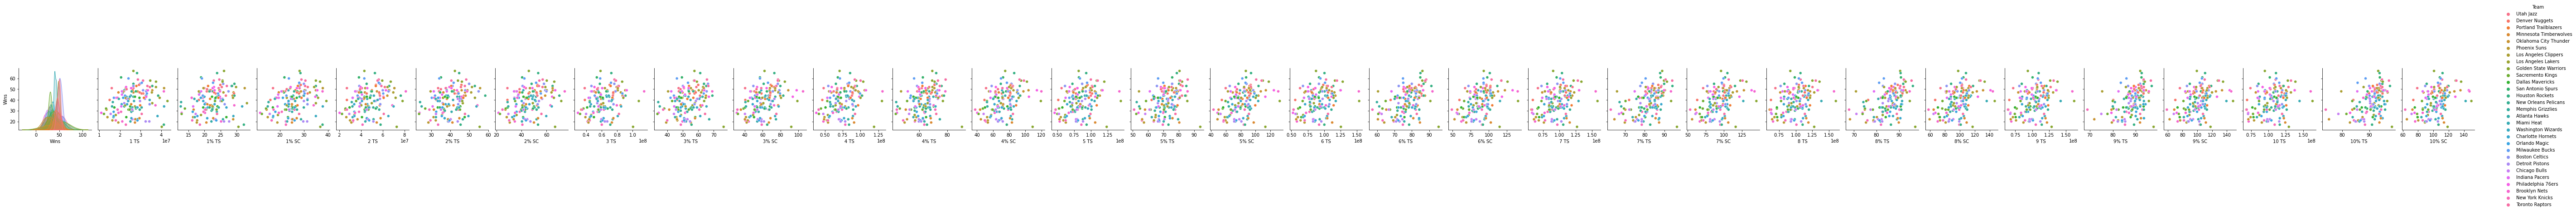

In [16]:
sns.pairplot(NBA, y_vars=["Wins"], hue="Team")

<AxesSubplot:xlabel='5% SC', ylabel='Wins'>

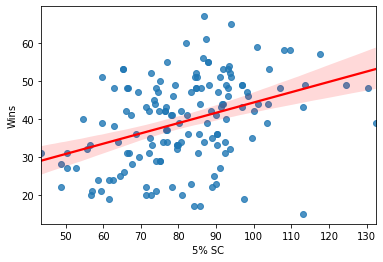

In [30]:
sns.regplot(x=NBA['5% SC'],y=NBA['Wins'],line_kws={"color": "red"})

In [33]:
y = NBA['Wins']
X = NBA['7% SC']
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12, test_size=0.2)

In [38]:
model = linear_model.LinearRegression(normalize=True)
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.1589465642296125

In [39]:
y_pred = model.predict(X_test)

Text(0, 0.5, 'Predicted values')

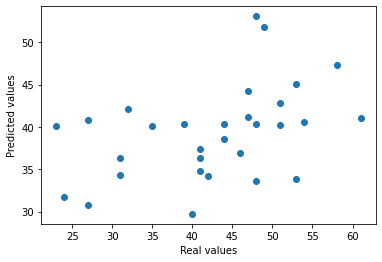

In [40]:
plt.scatter(y_test, y_pred)
plt.xlabel('Real values')
plt.ylabel('Predicted values')

In [41]:
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

In [42]:

model = sm.OLS(y_train, X_train)
modelResults = model.fit()
modelResults.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wins   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     22.30
Date:                Mon, 20 Sep 2021   Prob (F-statistic):           6.48e-06
Time:                        17:07:29   Log-Likelihood:                -454.31
No. Observations:                 120   AIC:                             912.6
Df Residuals:                     118   BIC:                             918.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0647      5.899      1.876      0.063      -0.617      22.746
7% SC          0.2952      0.063      4.722      0.000       0.171       0.419
==============================================================================
Omnibus:                        0.208   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.901   Jarque-Bera (JB):                0.241
Skew:                          -0.096   Prob(JB):                        0.886
Kurtosis:                       2.895   Cond. No.                         567.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
y_pred = modelResults.predict(X_test)

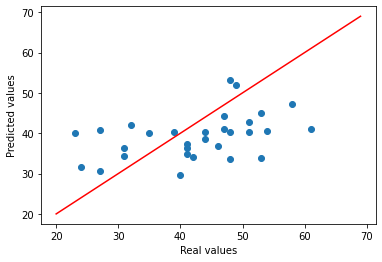

In [46]:

plt.scatter(y_test, y_pred)

plt.plot([x for x in range(20,70)],[x for x in range(20,70)], color='red')


plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.show()

In [53]:
#same idea now with more columns

X = NBA.drop(["Wins", "Team"],axis=1)

X = sm.add_constant(X)
y = NBA[["Wins"]]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=12)

In [54]:
model3 = sm.OLS(y_train, X_train)

model3Results = model3.fit()

model3Results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wins   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     3.286
Date:                Mon, 20 Sep 2021   Prob (F-statistic):           7.60e-06
Time:                        17:18:37   Log-Likelihood:                -419.97
No. Observations:                 120   AIC:                             901.9
Df Residuals:                      89   BIC:                             988.3
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.8348     33.603      0.471      0.639     -50.934      82.603
1 TS       -1.708e-05    8.4e-06     -2.033      0.045   -3.38e-05   -3.84e-07
1% TS          1.9195      5.184      0.370      0.712      -8.380      12.219
1% SC         15.6927     11.058      1.419      0.159      -6.279      37.665
2 TS       -6.184e-06      1e-05     -0.618      0.538   -2.61e-05    1.37e-05
2% TS         -2.7846      6.776     -0.411      0.682     -16.249      10.680
2% SC          9.3697     12.244      0.765      0.446     -14.958      33.697
3 TS        4.279e-05   1.28e-05      3.341      0.001    1.73e-05    6.82e-05
3% TS          2.8790      8.664      0.332      0.740     -14.335      20.093
3% SC        -45.4145     14.476     -3.137      0.002     -74.178     -16.651
4 TS       -4.057e-05   1.69e-05     -2.405      0.018   -7.41e-05   -7.06e-06
4% TS        -14.8665     11.380     -1.306      0.195     -37.479       7.746
4% SC         51.9797     21.345      2.435      0.017       9.568      94.391
5 TS       -4.206e-06   2.46e-05     -0.171      0.865   -5.31e-05    4.47e-05
5% TS          8.4527     19.217      0.440      0.661     -29.732      46.637
5% SC         -1.8336     34.166     -0.054      0.957     -69.722      66.054
6 TS        2.221e-05   3.86e-05      0.575      0.566   -5.45e-05    9.89e-05
6% TS         14.7626     26.590      0.555      0.580     -38.071      67.596
6% SC        -36.5420     48.833     -0.748      0.456    -133.571      60.487
7 TS       -5.316e-06   5.06e-05     -0.105      0.917      -0.000    9.52e-05
7% TS        -12.1520     31.550     -0.385      0.701     -74.841      50.537
7% SC         19.7450     58.053      0.340      0.735     -95.605     135.095
8 TS       -9.147e-06   4.76e-05     -0.192      0.848      -0.000    8.54e-05
8% TS         16.8501     20.074      0.839      0.403     -23.036      56.737
8% SC         -9.9837     49.479     -0.202      0.841    -108.298      88.330
9 TS       -6.739e-06   5.76e-05     -0.117      0.907      -0.000       0.000
9% TS        -29.5780     24.589     -1.203      0.232     -78.437      19.281
9% SC         37.1096     61.135      0.607      0.545     -84.365     158.584
10 TS       1.385e-05   3.24e-05      0.428      0.670   -5.04e-05    7.81e-05
10% TS        14.0686     16.467      0.854      0.395     -18.651      46.788
10% SC       -28.6654     37.732     -0.760      0.449    -103.638      46.307
==============================================================================
Omnibus:                        1.358   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.507   Jarque-Bera (JB):                1.247
Skew:                          -0.248   Prob(JB):                        0.536
Kurtosis:                       2.940   Cond. No.                     2.62e+10
==

HUGE improvement 0.159 to 0.526 when you anaylse roster construction

In [55]:
y_pred = model3Results.predict(X_test)

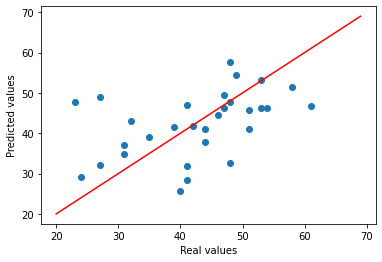

In [56]:
plt.scatter(y_test, y_pred)
plt.plot([x for x in range(20,70)],[x for x in range(20,70)], color = 'r')


plt.ylabel('Predicted values')
plt.xlabel('Real values')
plt.show()



In [57]:

def RMSE(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [58]:

matches = pd.DataFrame(y_test)
matches.rename(columns = {'Wins':'actual'}, inplace=True)
matches["predicted"] = y_pred

RMSE(matches["actual"], matches["predicted"])

9.520177155495416


The RMSE tells us how far, on average, our predictions were mistaken. 
An RMSE of 0 would mean we were making perfect predictions. 
9.5 signifies that we are, on average, about 9.5 wins off. That is terrible

In [59]:

X = NBA.drop(["Wins", "Team",'9 TS', '9% TS', '9% SC','10 TS', '10% TS', '10% SC'],axis=1)
y = NBA[["Wins"]]
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=12)

In [60]:
# Create the fifth model
rModel4 = sm.OLS(y_train, X_train)
# Fit the model
rModel4_results = rModel4.fit()
# Evaluate the model
rModel4_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wins   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     4.079
Date:                Mon, 20 Sep 2021   Prob (F-statistic):           4.53e-07
Time:                        17:29:09   Log-Likelihood:                -422.21
No. Observations:                 120   AIC:                             894.4
Df Residuals:                      95   BIC:                             964.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0922     23.304      0.433      0.666     -36.171      56.356
1 TS       -1.666e-05   7.96e-06     -2.092      0.039   -3.25e-05    -8.5e-07
1% TS          3.6719      4.571      0.803      0.424      -5.403      12.746
1% SC         13.6908     10.048      1.363      0.176      -6.257      33.639
2 TS       -5.439e-06   9.74e-06     -0.559      0.578   -2.48e-05    1.39e-05
2% TS         -5.2110      6.193     -0.841      0.402     -17.506       7.084
2% SC         10.7187     11.747      0.912      0.364     -12.603      34.040
3 TS        3.911e-05    1.2e-05      3.248      0.002    1.52e-05     6.3e-05
3% TS          4.6316      8.031      0.577      0.565     -11.312      20.575
3% SC        -43.0838     14.040     -3.069      0.003     -70.957     -15.211
4 TS       -3.744e-05   1.63e-05     -2.300      0.024   -6.97e-05   -5.13e-06
4% TS        -17.3085     10.677     -1.621      0.108     -38.506       3.889
4% SC         50.8138     20.819      2.441      0.017       9.483      92.145
5 TS       -4.781e-06    2.4e-05     -0.200      0.842   -5.23e-05    4.28e-05
5% TS         12.0422     17.974      0.670      0.505     -23.641      47.726
5% SC         -4.2164     32.726     -0.129      0.898     -69.185      60.752
6 TS        1.855e-05   3.76e-05      0.494      0.623    -5.6e-05    9.31e-05
6% TS         14.2442     22.931      0.621      0.536     -31.280      59.768
6% SC        -32.3333     46.855     -0.690      0.492    -125.352      60.685
7 TS       -1.239e-05   4.78e-05     -0.259      0.796      -0.000    8.26e-05
7% TS        -14.1610     25.734     -0.550      0.583     -65.249      36.927
7% SC         28.0093     55.299      0.507      0.614     -81.773     137.791
8 TS        8.693e-06   2.33e-05      0.373      0.710   -3.76e-05     5.5e-05
8% TS          2.1294     11.661      0.183      0.855     -21.021      25.279
8% SC        -12.5478     26.766     -0.469      0.640     -65.685      40.589
==============================================================================
Omnibus:                        0.701   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.704   Jarque-Bera (JB):                0.596
Skew:                          -0.172   Prob(JB):                        0.742
Kurtosis:                       2.970   Cond. No.                     2.02e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""